In [1]:
import json
import matplotlib.pyplot as plt

In [3]:
with open("data/121_results_v2.json") as file:
    data = json.load(file)

In [4]:
data['0_sparse_digit_recognition_svm'].keys()

dict_keys(['paperId', 'externalIds', 'corpusId', 'publicationVenue', 'url', 'title', 'abstract', 'venue', 'year', 'referenceCount', 'citationCount', 'influentialCitationCount', 'isOpenAccess', 'openAccessPdf', 'fieldsOfStudy', 's2FieldsOfStudy', 'tldr', 'publicationTypes', 'publicationDate', 'journal', 'citationStyles'])

In [5]:
data['0_sparse_digit_recognition_svm']

{'paperId': '1503cbd400cd902f9751995e27973b9286dfd320',
 'externalIds': {'MAG': '2149270675',
  'DBLP': 'journals/tnn/LabuschBM08',
  'DOI': '10.1109/TNN.2008.2005830',
  'CorpusId': 14358161,
  'PubMed': '19000969'},
 'corpusId': 14358161,
 'publicationVenue': {'id': '2ac50919-507e-41c7-93a8-721c4b804757',
  'name': 'IEEE Transactions on Neural Networks',
  'type': 'journal',
  'alternate_names': ['IEEE Trans Neural Netw'],
  'issn': '1045-9227',
  'alternate_issns': ['1941-0093'],
  'url': 'http://ieeexplore.ieee.org/servlet/opac?punumber=72'},
 'url': 'https://www.semanticscholar.org/paper/1503cbd400cd902f9751995e27973b9286dfd320',
 'title': 'Simple Method for High-Performance Digit Recognition Based on Sparse Coding',
 'abstract': 'In this brief paper, we propose a method of feature extraction for digit recognition that is inspired by vision research: a sparse-coding strategy and a local maximum operation. We show that our method, despite its simplicity, yields state-of-the-art cla

In [6]:
import pandas as pd

df = pd.DataFrame(data)
df = df.transpose()
df.head()

,paperId,externalIds,corpusId,publicationVenue,url,title,abstract,venue,year,referenceCount,...,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,tldr,publicationTypes,publicationDate,journal,citationStyles
0_sparse_digit_recognition_svm,1503cbd400cd902f9751995e27973b9286dfd320,"{'MAG': '2149270675', 'DBLP': 'journals/tnn/La...",14358161,"{'id': '2ac50919-507e-41c7-93a8-721c4b804757',...",https://www.semanticscholar.org/paper/1503cbd4...,Simple Method for High-Performance Digit Recog...,"In this brief paper, we propose a method of fe...",IEEE Transactions on Neural Networks,2008,35,...,4,False,None,"[Computer Science, Medicine]","[{'category': 'Computer Science', 'source': 'e...","{'model': 'tldr@v2.0.0', 'text': 'It is conclu...",[JournalArticle],2008-11-01,{'name': 'IEEE Transactions on Neural Networks...,"{'bibtex': '@Article{Labusch2008SimpleMF, aut..."
2_dot(s)-rnn,533ee188324b833e059cb59b654e6160776d5812,"{'DBLP': 'journals/corr/PascanuGCB13', 'MAG': ...",1870512,"{'id': '939c6e1d-0d17-4d6e-8a82-66d960df0e40',...",https://www.semanticscholar.org/paper/533ee188...,How to Construct Deep Recurrent Neural Networks,"In this paper, we explore different ways to ex...",International Conference on Learning Represent...,2013,48,...,67,False,None,"[Computer Science, Mathematics]","[{'category': 'Computer Science', 'source': 'e...","{'model': 'tldr@v2.0.0', 'text': 'Two novel ar...",[JournalArticle],2013-12-20,"{'name': 'CoRR', 'volume': 'abs/1312.6026'}","{'bibtex': '@Article{Pascanu2013HowTC, author..."
3_kepler,56cafbac34f2bb3f6a9828cd228ff281b810d6bb,"{'MAG': '3151929433', 'DBLP': 'journals/tacl/W...",208006241,"{'id': 'e0dbf116-86aa-418d-859f-a49952d7e44a',...",https://www.semanticscholar.org/paper/56cafbac...,KEPLER: A Unified Model for Knowledge Embeddin...,Abstract Pre-trained language representation m...,Transactions of the Association for Computatio...,2019,77,...,100,True,{'url': 'https://direct.mit.edu/tacl/article-p...,[Computer Science],"[{'category': 'Computer Science', 'source': 'e...","{'model': 'tldr@v2.0.0', 'text': 'A unified mo...",[JournalArticle],2019-11-13,{'name': 'Transactions of the Association for ...,"{'bibtex': '@Article{Wang2019KEPLERAU, author..."
4_mv-rnn,27e38351e48fe4b7da2775bf94341738bc4da07e,"{'DBLP': 'conf/emnlp/SocherHMN12', 'MAG': '188...",806709,"{'id': '41bf9ed3-85b3-4c90-b015-150e31690253',...",https://www.semanticscholar.org/paper/27e38351...,Semantic Compositionality through Recursive Ma...,Single-word vector space models have been very...,Conference on Empirical Methods in Natural Lan...,2012,44,...,128,False,None,[Computer Science],"[{'category': 'Computer Science', 'source': 'e...","{'model': 'tldr@v2.0.0', 'text': 'A recursive ...","[JournalArticle, Conference, Review]",2012-07-12,{'pages': '1201-1211'},"{'bibtex': '@Article{Socher2012SemanticCT, au..."
5_n-gram_lm,fdf4aa623e4d5b5edaeb873ed8e8b1cef0b59c87,"{'MAG': '1549285799', 'DBLP': 'conf/interspeec...",13988648,None,https://www.semanticscholar.org/paper/fdf4aa62...,Statistical language modeling using the CMU-ca...,The CMU Statistical Language Modeling toolkit ...,EUROSPEECH,1997,18,...,38,True,{'url': 'https://figshare.com/articles/journal...,[Computer Science],"[{'category': 'Computer Science', 'source': 'e...","{'model': 'tldr@v2.0.0', 'text': 'The conventi...",[JournalArticle],1997-09-22,{'pages': '2707-2710'},{'bibtex': '@Article{Clarkson1997StatisticalLM...


(0.0, 10000.0)

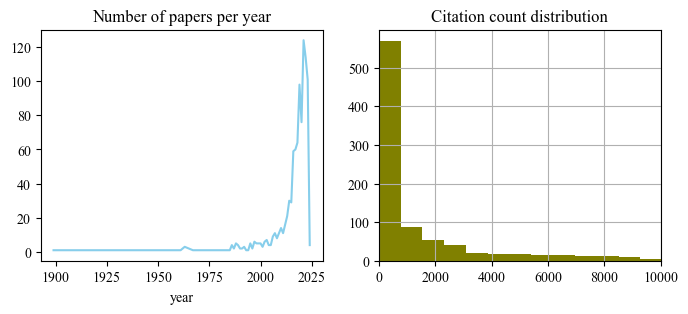

In [7]:
# set Times new roman
plt.rcParams['font.family'] = 'Times New Roman'

# Creating the subplot
fig, axs = plt.subplots(1, 2, figsize=(8, 3))

axs[0] = df.groupby('year')['paperId'].count().plot(ax=axs[0], color='skyblue')
axs[0].set_title('Number of papers per year')

axs[1] = df['citationCount'].hist(ax=axs[1], color='olive', bins=200)
axs[1].set_title('Citation count distribution')
axs[1].set_xlim(0, 10000)

In [8]:
def field_other_than_cs(fields):
    if not fields:
        return "Unknown"
    for f in fields:
        if f != "Computer Science":
            return f
    if f in ["Computer Science"]:
        return "Computer Science"

df["secondary_field"] = df["fieldsOfStudy"].apply(field_other_than_cs)
df["secondary_field"].value_counts()

secondary_field
Computer Science    657
Mathematics         155
Medicine             58
Engineering          35
Biology              26
Unknown              10
Psychology            4
Physics               4
Economics             2
Chemistry             1
History               1
Name: count, dtype: int64

Text(0.5, 1.0, 'Paper open access distribution')

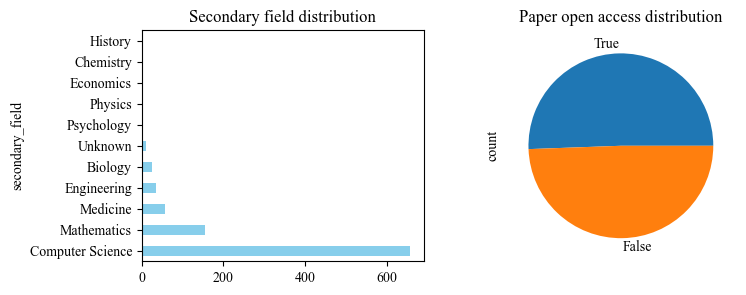

In [9]:
# set Times new roman
plt.rcParams['font.family'] = 'Times New Roman'

# Creating the subplot
fig, axs = plt.subplots(1, 2, figsize=(8, 3))

axs[0] = df['secondary_field'].value_counts().plot(kind='barh', ax=axs[0], color='skyblue')
axs[0].set_title('Secondary field distribution')

axs[1] = df['isOpenAccess'].value_counts().plot(ax=axs[1], kind='pie', color='olive')
axs[1].set_title('Paper open access distribution')

In [10]:
def get_pub_venue(x):
    if not x:
        return "unknown"
    if 'type' in x.keys():
        return x['type']
    else:
        return "unknown"

df["pub_type"] = df["publicationVenue"].apply(get_pub_venue)

Text(0.5, 1.0, 'Publishing venue distribution')

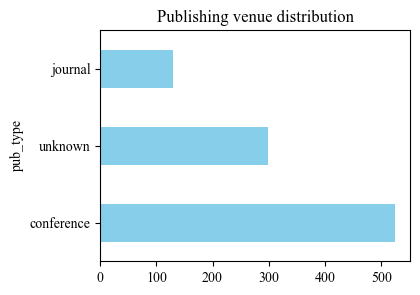

In [11]:
# Creating the subplot
fig, axs = plt.subplots(1, 1, figsize=(4, 3))

df['pub_type'].value_counts().plot(kind='barh', color='skyblue')
axs.set_title('Publishing venue distribution')